In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# nhanes_2015_2016.csv
da=pd.read_csv('C:/Users/dragana/Documents/EKOF/data/NHANES.csv')

In [4]:
da.head().T

,0,1,2,3,4
SEQN,83732.00,83733.00,83734.00,83735.0,83736.00
ALQ101,1.00,1.00,1.00,2.0,2.00
ALQ110,NaN,NaN,NaN,1.0,1.00
ALQ130,1.00,6.00,NaN,1.0,1.00
SMQ020,1.00,1.00,1.00,2.0,2.00
RIAGENDR,1.00,1.00,1.00,2.0,2.00
RIDAGEYR,62.00,53.00,78.00,56.0,42.00
RIDRETH1,3.00,3.00,3.00,3.0,4.00
DMDCITZN,1.00,2.00,1.00,1.0,1.00
DMDEDUC2,5.00,3.00,3.00,5.0,4.00


In [5]:
#https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2
da.DMDEDUC2.value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

In [6]:
print(da.DMDEDUC2.value_counts().sum())

5474


In [7]:
print( 1621+1366+1186+655+643+ 3)

5474


In [8]:
print(da.shape)

(5735, 28)


In [9]:
# isnull (pandas)
pd.isnull(da.DMDEDUC2).sum()

261

In [10]:
5735-5474

261

In [11]:
da["DMDEDUC2x"]=da.DMDEDUC2.replace({1:"<9", 2:"9-11", 3: "HS/GED", 4:"Some college/AA", 5:"college", 7:"Refused", 9:"Don't Know"})

In [12]:
da.DMDEDUC2x.value_counts()

Some college/AA    1621
college            1366
HS/GED             1186
<9                  655
9-11                643
Don't Know            3
Name: DMDEDUC2x, dtype: int64

In [13]:
#RIAGENDR
da["RIAGENDRx"]=da.RIAGENDR.replace({1: "Male", 2:"Female"})

In [14]:
x=da.DMDEDUC2x.value_counts()

In [15]:
x

Some college/AA    1621
college            1366
HS/GED             1186
<9                  655
9-11                643
Don't Know            3
Name: DMDEDUC2x, dtype: int64

In [19]:
m=x.sum() #1621+1366+1186+655+643+ 3=5474

In [20]:
x/m  #x/x.sum()

Some college/AA    0.296127
college            0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
Don't Know         0.000548
Name: DMDEDUC2x, dtype: float64

In [21]:
1621/5474

0.2961271465107782

In [22]:
da["DMDEDUC2x"]=da.DMDEDUC2x.fillna("Missing")
x=da.DMDEDUC2x.value_counts()


In [24]:
x/x.sum()

Some college/AA    0.282650
college            0.238187
HS/GED             0.206800
<9                 0.114211
9-11               0.112119
Missing            0.045510
Don't Know         0.000523
Name: DMDEDUC2x, dtype: float64

In [25]:
da.BMXWT.dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

In [26]:
x=da.BMXWT.dropna()

In [27]:
da.BMXWT.describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

In [28]:
x=da.BMXWT.dropna()
print(x.mean())

81.34267560889509


In [29]:
print(np.mean(x))

81.34267560889509


In [30]:
print(x.median())

78.2


In [31]:
print(np.percentile(x, 50))

78.2


In [32]:
print(np.percentile(x, 75)) #numpy method

92.7


In [34]:
print(x.quantile(0.75)) #metod u okviru Pandas

92.7


In [35]:
# BPXSY1

da.BPXSY2.mean()

124.78301716350497

In [36]:
np.mean((da.BPXSY1>=120) & (da.BPXSY2<=139))  # & means and

0.3741935483870968

In [37]:
np.mean((da.BPXDI1>=80) & (da.BPXDI2<=89)) 

0.14803836094158676

In [38]:
a=(da.BPXSY1>=120) & (da.BPXSY2<=139)
b=(da.BPXDI1>=80) & (da.BPXDI2<=89)
 # & means and, | means or 
print(np.mean(a|b))    

0.43975588491717527


In [39]:
print(np.mean(da.BPXSY1 - da.BPXSY2))
print(np.mean(da.BPXDI1 - da.BPXDI2))

0.6749860309182343
0.3490407897187558


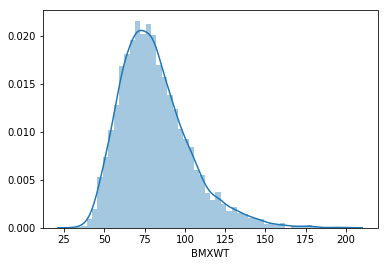

In [40]:
#BMXWT
sns.distplot(da.BMXWT.dropna())

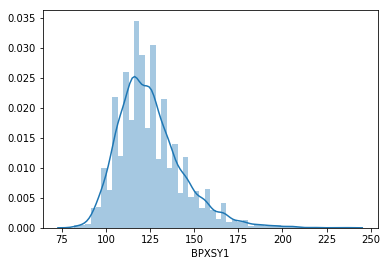

In [41]:
sns.distplot(da.BPXSY1.dropna())

Text(0, 0.5, 'blood pressure in mm/Hg')

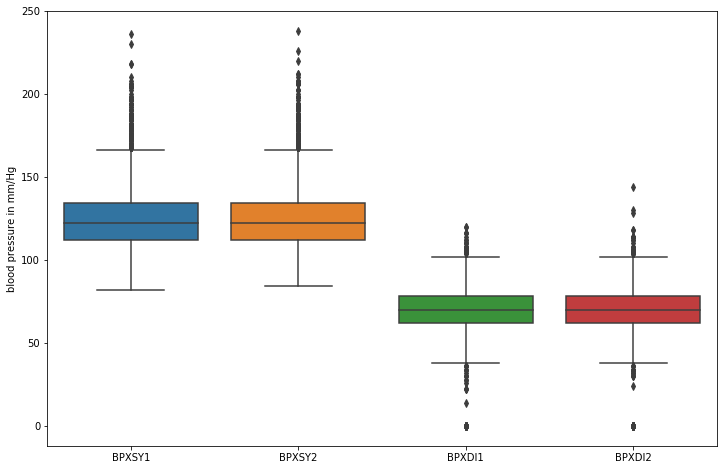

In [45]:
#"BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"

bp=sns.boxplot(data=da.loc[:,["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])
bp.set_ylabel("blood pressure in mm/Hg")

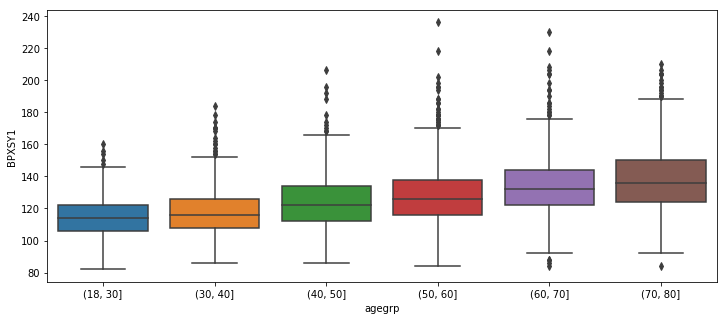

In [46]:
da["agegrp"]=pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70 ,80] )
plt.figure(figsize=(12, 5))
sns.boxplot(x="agegrp",y="BPXSY1", data=da)

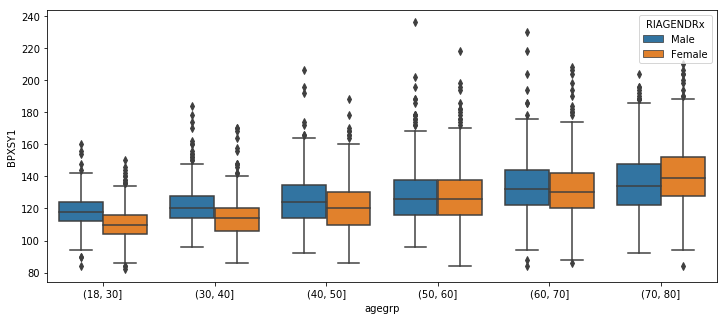

In [48]:
da["agegrp"]=pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70 ,80] )
plt.figure(figsize=(12, 5))
sns.boxplot(x="agegrp",y="BPXSY1", hue="RIAGENDRx" , data=da)

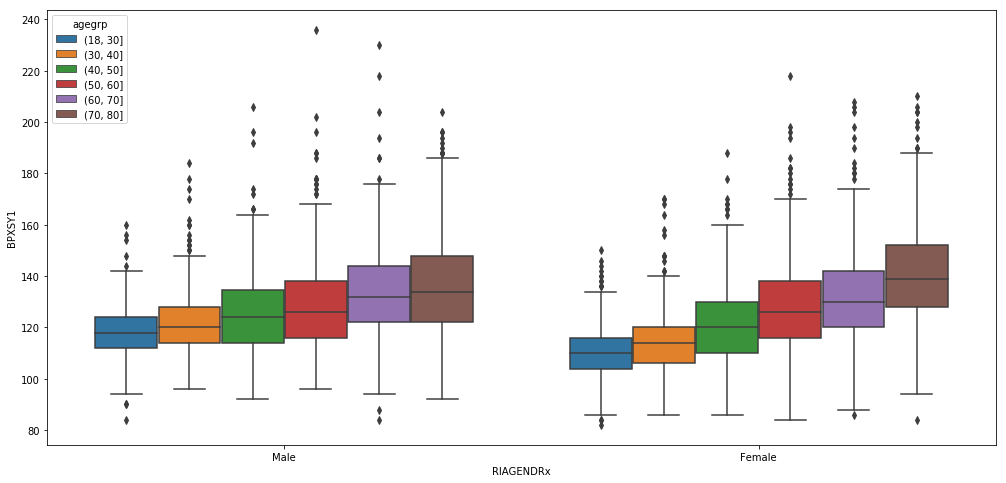

In [50]:
da["agegrp"]=pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70 ,80])
plt.figure(figsize=(17, 8))
sns.boxplot(x="RIAGENDRx",y="BPXSY1", hue="agegrp" , data=da)

In [51]:
da.groupby("agegrp")["DMDEDUC2x"].value_counts()

agegrp    DMDEDUC2x      
(18, 30]  Some college/AA    364
          college            278
          HS/GED             237
          Missing            128
          9-11                99
          <9                  47
(30, 40]  Some college/AA    282
          college            264
          HS/GED             182
          9-11               111
          <9                  93
(40, 50]  Some college/AA    262
          college            260
          HS/GED             171
          9-11               112
          <9                  98
(50, 60]  Some college/AA    258
          HS/GED             220
          college            220
          9-11               122
          <9                 104
(60, 70]  Some college/AA    238
          HS/GED             192
          college            188
          <9                 149
          9-11               111
(70, 80]  Some college/AA    217
          HS/GED             184
          <9                 164
          college

In [55]:
dx=da.loc[~da.DMDEDUC2x.isin(["Don't Know", "Missing"]),:]
dx=dx.groupby(["agegrp","RIAGENDRx"])["DMDEDUC2x"]
dx=dx.value_counts()
dx=dx.unstack()
dx=dx.apply(lambda x: x/x.sum(), axis=1)
print(dx)

DMDEDUC2x               9-11        <9    HS/GED  Some college/AA   college
agegrp   RIAGENDRx                                                         
(18, 30] Female     0.079566  0.048825  0.215190         0.374322  0.282098
         Male       0.116525  0.042373  0.250000         0.332627  0.258475
(30, 40] Female     0.088608  0.097046  0.164557         0.335443  0.314346
         Male       0.150655  0.102620  0.227074         0.268559  0.251092
(40, 50] Female     0.109562  0.105578  0.173307         0.312749  0.298805
         Male       0.142145  0.112219  0.209476         0.261845  0.274314
(50, 60] Female     0.117021  0.102128  0.234043         0.302128  0.244681
         Male       0.147577  0.123348  0.242291         0.255507  0.231278
(60, 70] Female     0.117914  0.188209  0.206349         0.292517  0.195011
         Male       0.135011  0.151030  0.231121         0.249428  0.233410
(70, 80] Female     0.105134  0.224939  0.239609         0.281174  0.149144
         Mal

In [56]:
da['DMDMARTL'].value_counts()

1.0     2780
5.0     1004
3.0      579
6.0      527
2.0      396
4.0      186
77.0       2
Name: DMDMARTL, dtype: int64

In [57]:
da['DMDMARTL'].isnull().sum()

261

In [58]:
da['DMDMARTLx']=da['DMDMARTL'].replace({1: 'Married', 2: 'Widowed', 3: 'Divorced', 4: 'Separated',
                                                  5: 'Never Married', 6: 'Living With Partner', 
                                                  77: 'Refused', 99: "Don't Know"})

In [60]:
da['DMDMARTLx'].value_counts()

Married                2780
Never Married          1004
Divorced                579
Living With Partner     527
Widowed                 396
Separated               186
Refused                   2
Name: DMDMARTLx, dtype: int64

In [61]:
import statsmodels.api as sm

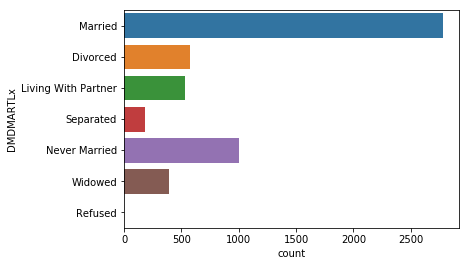

In [62]:
sns.countplot(y=da['DMDMARTLx'])